<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Which-correlation-method-to-use?" data-toc-modified-id="Which-correlation-method-to-use?-1">Which correlation method to use?</a></span></li><li><span><a href="#Function-description" data-toc-modified-id="Function-description-2">Function description</a></span><ul class="toc-item"><li><span><a href="#1.-get_outliers" data-toc-modified-id="1.-get_outliers-2.1">1. <code>get_outliers</code></a></span><ul class="toc-item"><li><span><a href="#Input" data-toc-modified-id="Input-2.1.1"><em>Input</em></a></span></li><li><span><a href="#Output" data-toc-modified-id="Output-2.1.2"><em>Output</em></a></span></li></ul></li><li><span><a href="#2.-do_correlation" data-toc-modified-id="2.-do_correlation-2.2">2. <code>do_correlation</code></a></span><ul class="toc-item"><li><span><a href="#Input" data-toc-modified-id="Input-2.2.1"><em>Input</em></a></span></li><li><span><a href="#Output" data-toc-modified-id="Output-2.2.2"><em>Output</em></a></span></li></ul></li><li><span><a href="#3.-plot_correlation" data-toc-modified-id="3.-plot_correlation-2.3">3. <code>plot_correlation</code></a></span><ul class="toc-item"><li><span><a href="#Input" data-toc-modified-id="Input-2.3.1"><em>Input</em></a></span></li><li><span><a href="#Output" data-toc-modified-id="Output-2.3.2"><em>Output</em></a></span></li></ul></li></ul></li><li><span><a href="#Examples" data-toc-modified-id="Examples-3">Examples</a></span><ul class="toc-item"><li><span><a href="#Load-the-'flexible-correlations'-script" data-toc-modified-id="Load-the-'flexible-correlations'-script-3.1">Load the 'flexible correlations' script</a></span></li><li><span><a href="#A-standart-correlation-plot" data-toc-modified-id="A-standart-correlation-plot-3.2">A standart correlation plot</a></span></li><li><span><a href="#A-plot-with-outliers-displayed" data-toc-modified-id="A-plot-with-outliers-displayed-3.3">A plot with outliers displayed</a></span></li><li><span><a href="#Inspecting-outliers" data-toc-modified-id="Inspecting-outliers-3.4">Inspecting outliers</a></span></li><li><span><a href="#Multiple-correlation-plots" data-toc-modified-id="Multiple-correlation-plots-3.5">Multiple correlation plots</a></span></li></ul></li></ul></div>

# Which correlation method to use?

**Pearson's correlation** is the most popular for continuous data. However, if data has outliers or does not meet the normality assumption, Pearson's correlation is inappropriate. Instead, one should use robust correlation methods, for example, **Spearman skipped** or **percentage-bend** correlation. On the other hand, if data is normally distributed and has no outliers, Pearson's correlation gives more power. Here I provide an R-script that first inspects the data for outliers and normality and then chooses the most appropriate of the three correlation methods. Based on [Pernet et al. (2013)](https://doi.org/10.3389/fpsyg.2012.00606 "Pernet, C. R., Wilcox, R. R., & Rousselet, G. A. (2013). Robust correlation analyses: false positive and power validation using a new open source matlab toolbox. Frontiers in psychology, 606."), I follow three simple rules of thumb for selecting the correlation method:
* **Pearson's correlation**: Data is normally distributed and has no outliers
* **Spearman skipped correlation**: Data has bi-variate outliers
    * Using the minimum covariance determinant (MCD) estimator
* **(20%) Percentage-bend correlation**: Data has no bi-variate outliers but is not normally distributed or has univariate outliers

The **'Flexible Correlation'** script is available from my [GitHub repository](https://github.com/dcdace/R_functions/tree/main/flexible-correlations).

# Function description
`flexible_correlation.r` script contains three functions.

## 1. `get_outliers`

**`get_outliers`** function checks for outliers in the data. It uses the `boxplot` method to check for univariate outliers and the `bagplot` method for bi-variate outliers.

### *Input*

`get_outliers(var1, var2,  
    var1name = "var1",  
    var2name = "var2",  
    var1ylab = "",  
    var2ylab = "",  
    disp = FALSE)`

* Required
    * `var1` and `var2` are numerical vectors; the two continuous variables you want to correlate.  
* Optional
    * `var1name` and `var2name` are strings; names of the variables to be displayed on boxplots. The default is "var1" and "var2".
    * `var1ylab` and `var2ylab` are strings; y-axis labels for the two variables to be displayed on boxplots. The defaults are empty strings. 
    * `disp` is logical. Whether you want to display the outlier results (boxplots and bagplot). The default is `FALSE`.
    
### *Output*

A 3-item list of outlier cases:
1. All outlier cases
2. Univariate outlier cases
3. Bi-variate outlier cases

The output is used by the other two functions, `do_correlation` and `plot_correlation`.

## 2. `do_correlation`

**`do_correlation`** function performs one of the three correlation methods. It uses the number of univariate and bi-variate outliers obtained from the `get_outlier` function. It performs the `Shapiro test` to determine whether the data is normally distributed.

### *Input*
`do_correlation(var1, var2,  
    outliers = NULL)`

* Required
    * `var1` and `var2` are numerical vectors; the two continuous variables you want to correlate.  
* Optional
    * `outliers` is the list of outliers in the data. If not provided, then `get_outliers` function will be executed to get the outlier list.
    
### *Output*

A 2-item list:
1. Correlation results in the form to be displayed on the correlation plot.
2. A p-value of the correlation.  
The output is used by the `plot_correlation` function.


## 3. `plot_correlation`

**`plot_correlation`** function displays a scatterplot, trend line with shaded 95%CI, and correlation results in a text form at the top. 

### *Input*

`plot_correlation(var1, var2, 
    var1name = "var1", 
    var2name = "var2",
    pointsize = 1.8, 
    txtsize = 11, 
    corRes = NULL,
    outliers = NULL,
    plotoutliers = FALSE,
    pthreshold = NULL)`  

* Required
    * `var1` and `var2` are numerical vectors; the two continuous variables you want to correlate.  
* Optional
    * `pointsize`is numeric; the size of the scatterplot points. The default is 1.8.
    * `txtsize` is numeric; the font size of the scatterplot labels. The default is 11. The title size would be 2 points larger.
    * `corRes` is the correlation results from the function `do_correlation`. If not provided, the `do_correlation` function will be executed to get the results. 
    * `outliers` is the list of outliers in the data. If not provided, then `get_outliers` function will be executed to get the outlier list. 
    * `plotoutliers` is logical. Whether to plot outlier cases on the scatterplot. The default is `FALSE`. 
    * `pthreshold` is numeric; a p-value threshold for statistically significant correlation. If provided, a red box will be displayed around the scaterplot and the result text will be displayed in bold.
    
### *Output*

A correlation scatterplot with result text at the top. 

# Examples
## Load the 'flexible correlations' script

In [7]:
source(
    "https://raw.githubusercontent.com/dcdace/R_functions/main/flexible-correlations/flexible_correlations.r")

# plot size for jupyter notebook
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 200)

## A standart correlation plot
Let's use the R built-in dataset `mtcars` and look at the correlation between automobile weight and fuel consumption.

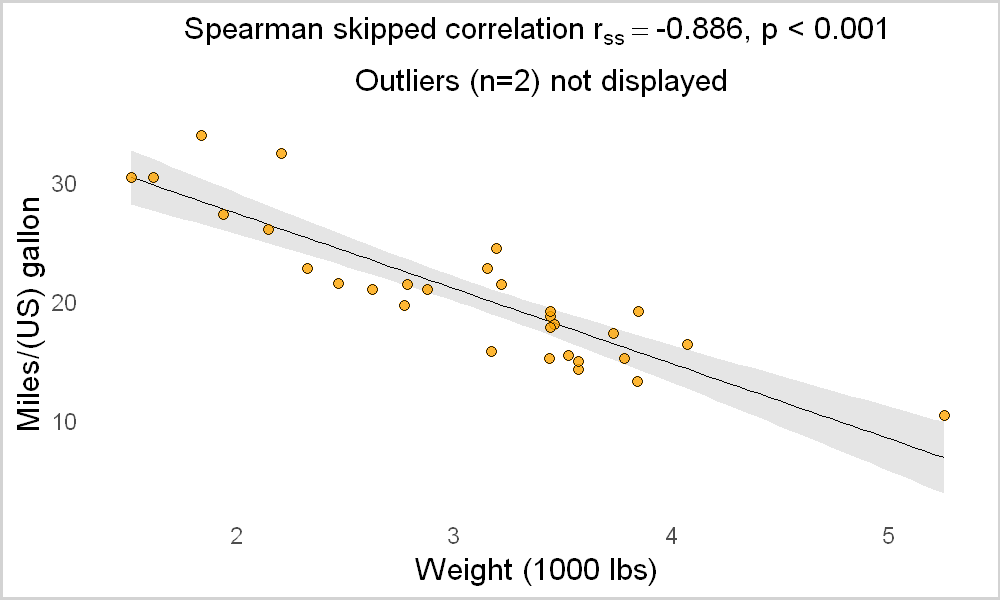

In [8]:
# get the dataset
df <- mtcars
# plot the result
plot_correlation(df$wt, df$mpg,
                 var1name = "Weight (1000 lbs)",
                 var2name = "Miles/(US) gallon")

We see that Spareman skipped correlation was performed, and it was significant. We also see that there were two outliers in the data. 

## A plot with outliers displayed

You can also display the outlier cases on the scatterplot if you like.

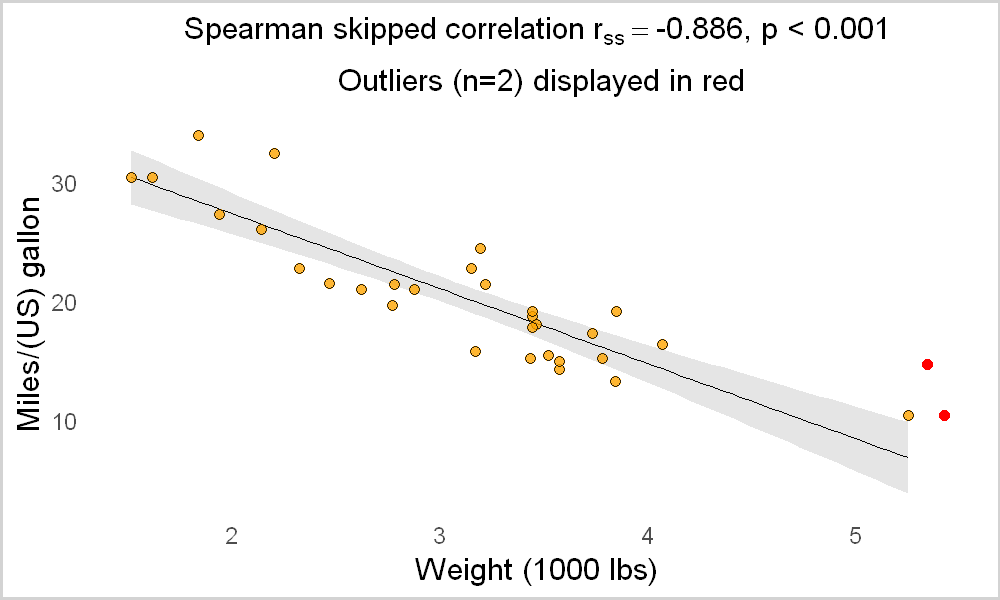

In [9]:
# plot the result, including outlier cases
plot_correlation(df$wt, df$mpg,
                 var1name = "Weight (1000 lbs)",
                 var2name = "Miles/(US) gallon",
                 plotoutliers = TRUE)

## Inspecting outliers
You might want to inspect the data outliers more closely. For that, you can run the `get_outliers` function with `disp = TRUE` setting.

[1] "Weight (1000 lbs) outliers: 2"
[1] 16 17
[1] "Miles/(US) gallon outliers: 0"
numeric(0)
[1] "Bi-variate outliers: 1"
[1] 17


[[1]]
[1] 16 17 17

[[2]]
[1] 16 17

[[3]]
[1] 17

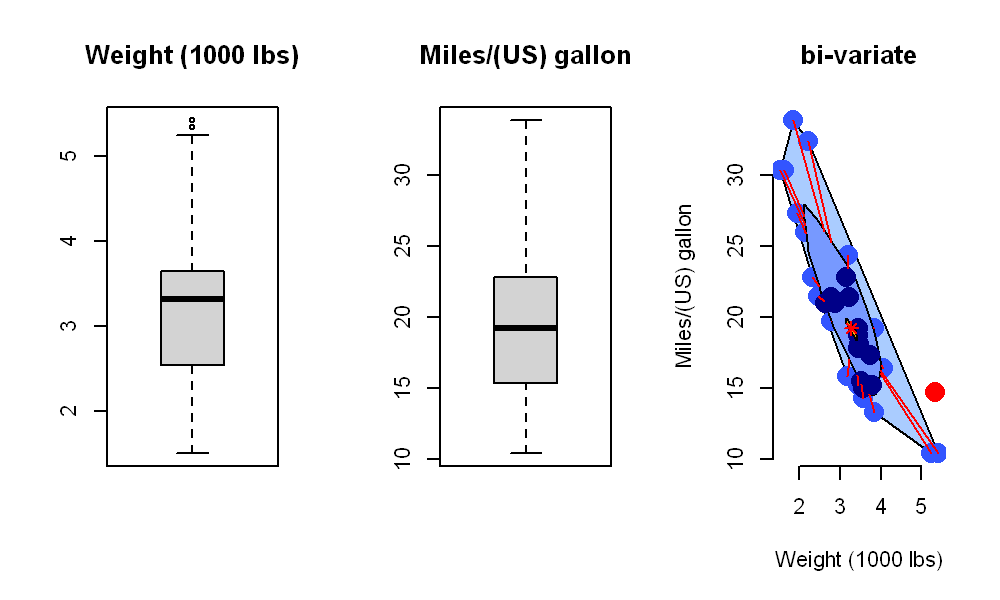

In [10]:
get_outliers(df$wt, df$mpg,
             var1name = "Weight (1000 lbs)",
             var2name = "Miles/(US) gallon",
             disp = TRUE)

We see that there were two outliers in the 'weight' variable, no outliers in the 'fuel consumption' variable, and one bi-variate outlier. The robust Spearman skipped correlation is most appropriate because of the bi-variate outlier in the data.

## Multiple correlation plots

I have found this 'flexible correlation' script particularly handy for explorations, looking at several correlations together.

In [11]:
# To bind plots together, I will use gridExtra package
# Install and load gridExtra
if (length(find.package("gridExtra", quiet = TRUE)) == 0) {
  install.packages("gridExtra", dependencies = TRUE)
  library(gridExtra)
}

As an example, let's look at another R built-in dataset `iris` and correlate the petal length and petal width for each species of Iris flower.

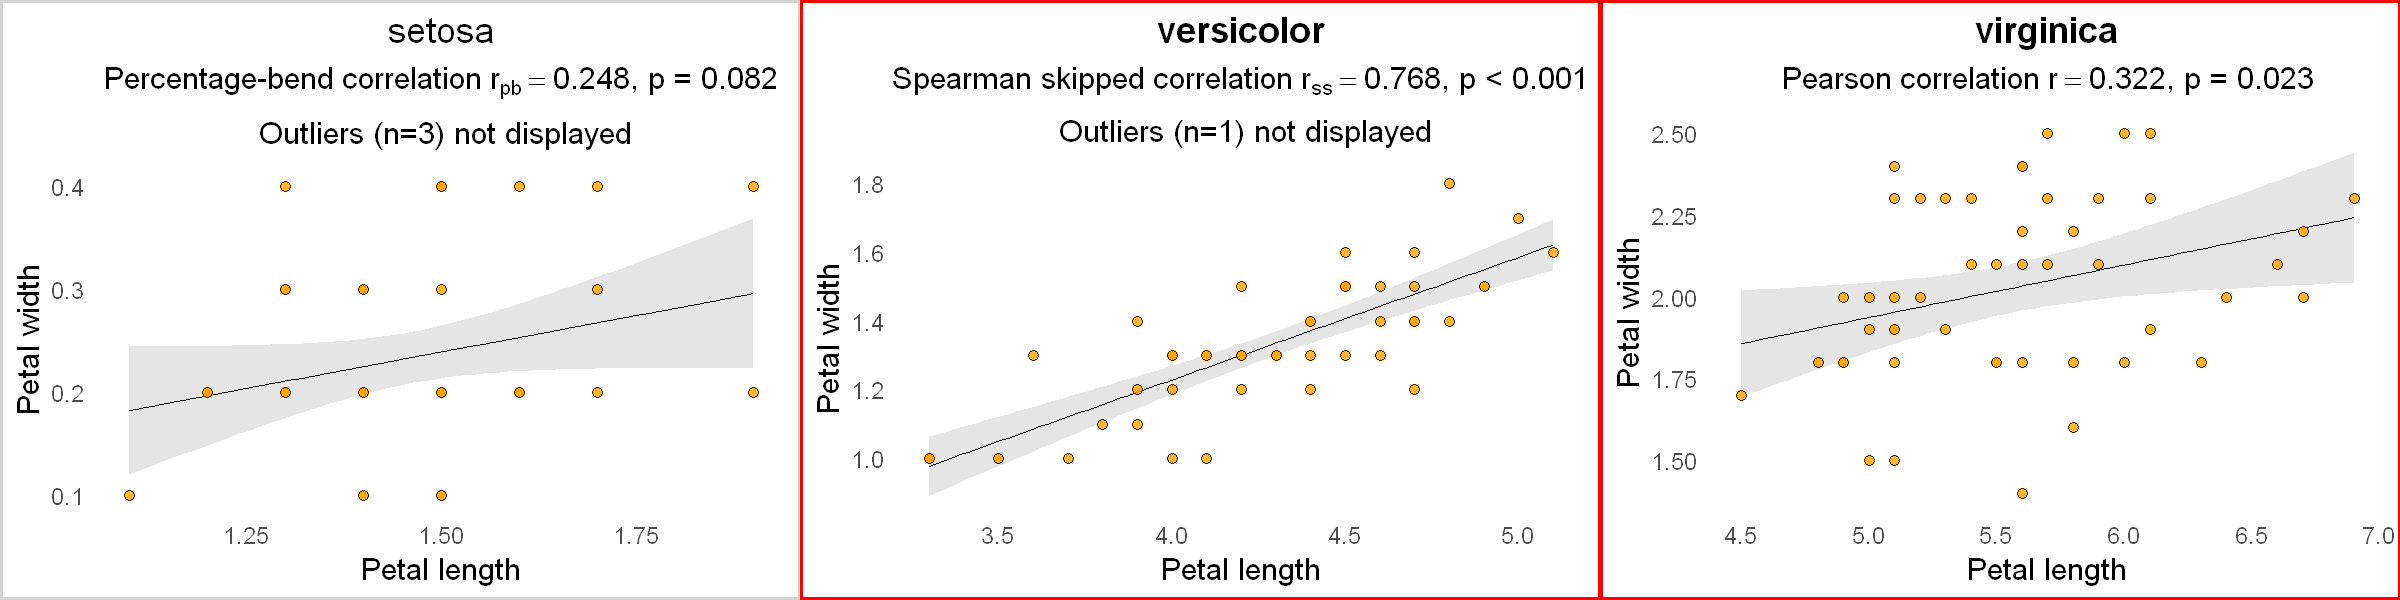

In [3]:
# plot size for jupyter notebook
options(repr.plot.width = 12, repr.plot.height = 3)

# get the dataset
df <- iris
# get the species types and how many they are
iris.species <- levels(df$Species)
nspecies <- length(iris.species)
# create an empty list where plots will be stored
plotlist <- list()
# for each species type, plot the correlation
for (i in 1:nspecies) {
  ds <- subset(df, df$Species == iris.species[i]) # a subset data for this species
  p <- plot_correlation(ds$Petal.Length, ds$Petal.Width,
                        var1name = "Petal length", var2name = "Petal width",
                        pthreshold = 0.05 / nspecies # p-value threshold, accounting for multiple comparisons
                       ) +
    labs(title = iris.species[i]) # add species name as a title for each plot 

  plotlist[[i]] <- p # add this plot to the plotlist
}
# display the plots
gridExtra::grid.arrange(grobs = plotlist, nrow = 1)